In [3]:
#Importing libraries that we will be using
%matplotlib inline
import statsmodels.api as sm
import numpy as np 
import scipy
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns
import 

In [4]:
#Reading our data
df=pd.read_csv('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Data prep

In [43]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')
from data_preProcess import data_preProcess
from data_info import dataframeInfo 
from data_visualization import exploration

In [6]:
data_preProcess = data_preProcess(df)
data_info = dataframeInfo(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
data_info.find_column_based_missing_percentage()

,total_missing_values,missing_percentage
auction_id,0,0.0 %
experiment,0,0.0 %
date,0,0.0 %
hour,0,0.0 %
device_make,0,0.0 %
platform_os,0,0.0 %
browser,0,0.0 %
yes,0,0.0 %
no,0,0.0 %


In [9]:
data_info.find_duplicates()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [10]:
data_info.find_dataframe_columns_unique_value_count()

,Unique Value Count
experiment,2
yes,2
no,2
platform_os,3
date,8
browser,15
hour,24
device_make,270
auction_id,8077


In [11]:
df.shape

(8077, 9)

In [14]:
data_info.find_memory_usage()

Current DataFrame Memory Usage of columns is :


Index            128
auction_id     64616
experiment     64616
date           64616
hour           64616
device_make    64616
platform_os    64616
browser        64616
yes            64616
no             64616
dtype: int64

In [15]:
data_info.find_matrix_correlation()

,hour,platform_os,yes,no
hour,1.000000,0.000062,0.013481,-0.021725
platform_os,0.000062,1.000000,0.054305,0.046941
yes,0.013481,0.054305,1.000000,-0.083098
no,-0.021725,0.046941,-0.083098,1.000000


#### * Data is clean no further operation

# Data Exploration

In [16]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [18]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [19]:
df.shape

(8077, 9)

In [20]:
response = df.copy(deep=True)

In [21]:
# getting users who only selects yes or no
response = response[response['yes'] == 1].append(response[response['no'] == 1])
response.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [22]:
response.shape

(1243, 9)

In [23]:
# finding the control group
control_df = response[response['experiment'] == 'control']
control_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1,0
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1,0


In [24]:
control_df.shape

(586, 9)

#### * there are 586 peoples with control group

In [25]:
# finding the exposed group
exposed_df = response[response['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1,0
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1,0


In [41]:
exposed_df.shape

(657, 9)

#### * there are 657 peoples with exposed group

In [42]:
experiment_groups = response.groupby(['experiment']).agg({'experiment': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.reset_index()
experiment_groups

,experiment,count
0,control,586
1,exposed,657


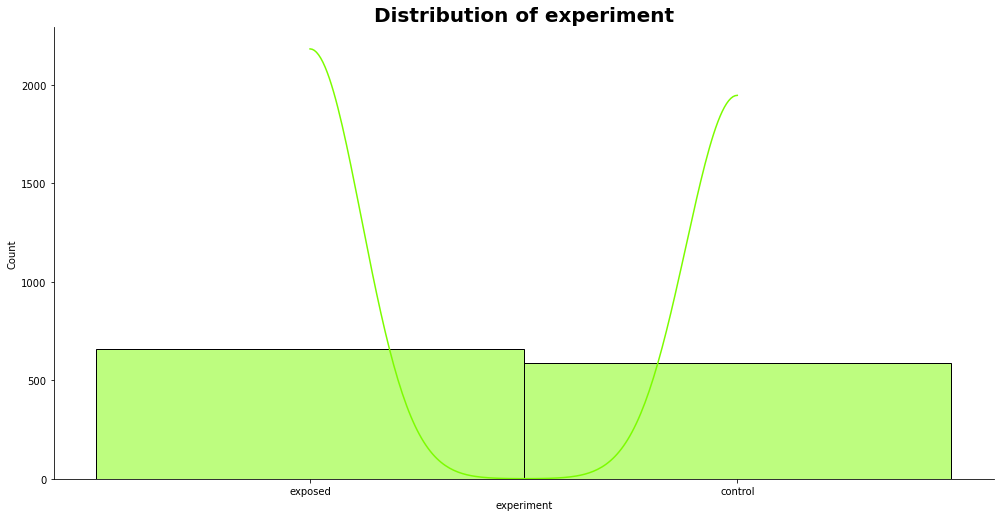

In [75]:
fig = exploration.plot_hist(response,'experiment','lawngreen')

In [32]:
date_data = response.groupby(['date']).agg({'date': ['count']})
date_data.columns = ['count']
date_data = date_data.reset_index()
date_data

,date,count
0,2020-07-03,325
1,2020-07-04,159
2,2020-07-05,117
3,2020-07-06,74
4,2020-07-07,83
5,2020-07-08,177
6,2020-07-09,184
7,2020-07-10,124


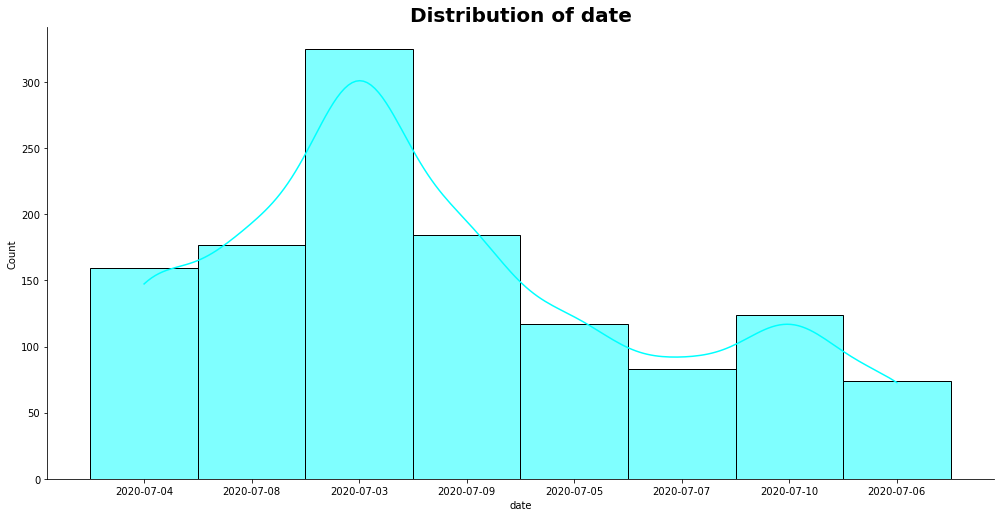

In [77]:
fig = exploration.plot_hist(response,'date','cyan')

In [34]:
hour_data = response.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['count']
hour_data = hour_data.reset_index()
hour_data

,hour,count
0,0,31
1,1,32
2,2,33
3,3,44
4,4,46
5,5,49
6,6,50
7,7,59
8,8,67
9,9,57


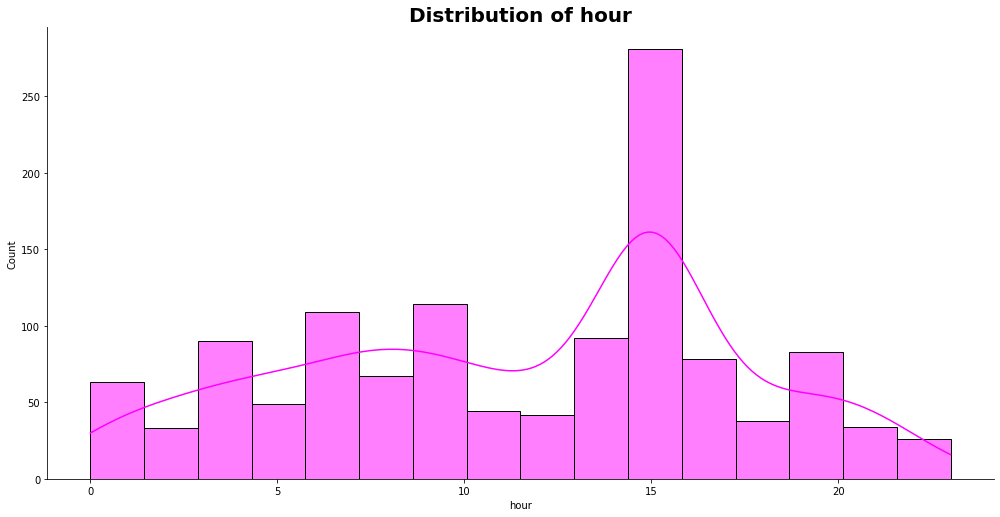

In [79]:
fig = exploration.plot_hist(response,'hour','magenta')

In [37]:
device_data = response.groupby(['device_make']).agg({'device_make': ['count']})
device_data.columns = ['count']
device_data = device_data.reset_index()
device_data

,device_make,count
0,A0001,1
1,ANE-LX1,6
2,CLT-L09,5
3,DLI-L22,1
4,E5823,1
...,...,...
110,XiaoMi Redmi 6A,1
111,XiaoMi Redmi Note 7,1
112,XiaoMi Redmi S2,1
113,YAL-L21,1


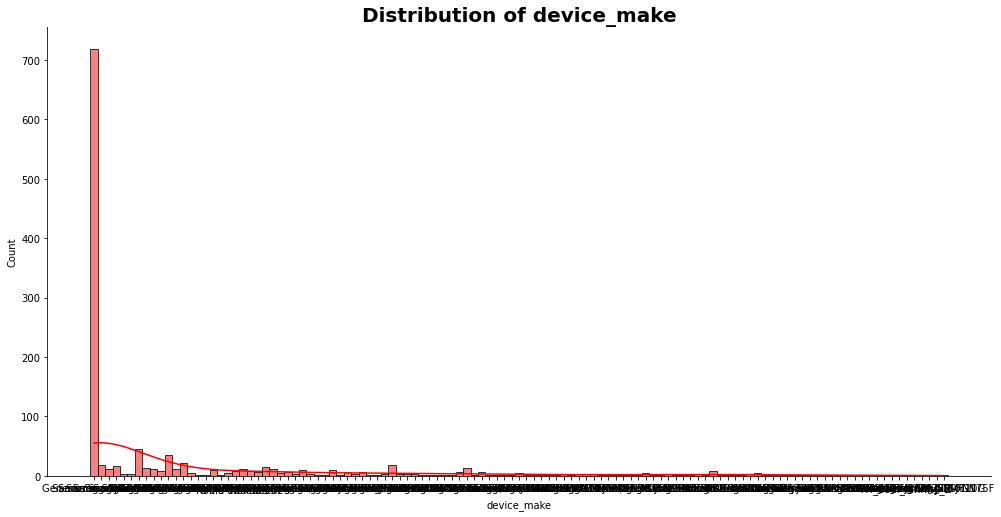

In [84]:
fig = exploration.plot_hist(response,'device_make','red')

In [55]:
browser_types = response['browser'].value_counts()
browser_types.columns = ['count']
browser_types = browser_types.reset_index()
browser_types

,index,browser
0,Chrome Mobile,695
1,Chrome Mobile WebView,227
2,Facebook,156
3,Samsung Internet,145
4,Mobile Safari,14
5,Mobile Safari UI/WKWebView,3
6,Chrome,2
7,Chrome Mobile iOS,1


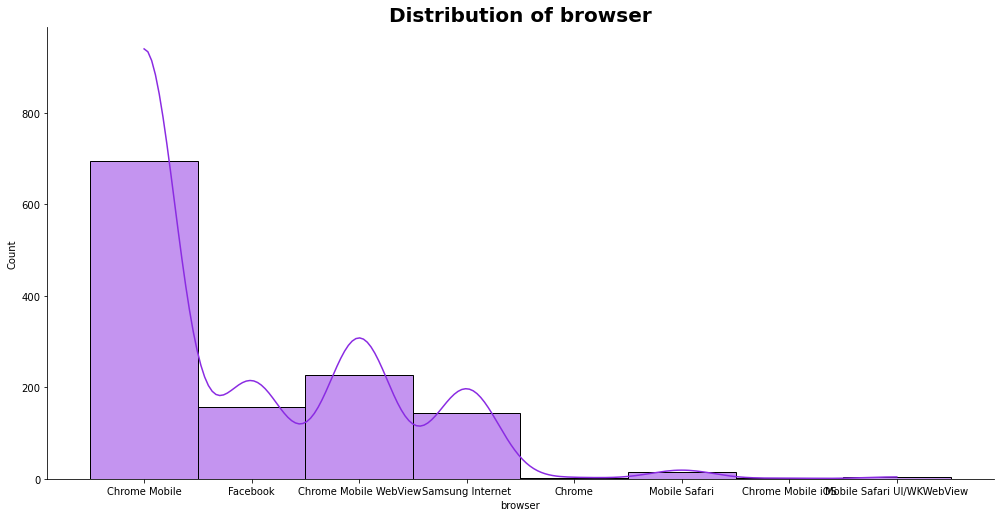

In [85]:
fig = exploration.plot_hist(response,'browser','blueviolet')